# **Household Chores:**

Problem Source: F. S. Hillier and G. J. Lieberman, "Introduction to Mathematical Programming," 2nd Edition, McGraw-Hill Inc., New York, 1995.

**Problem Statement:**

A young couple, Eve and Steven, want to divide their main household chores (marketing, cooking, dishwashing, and laundry) between them so that each has two tasks but the total time they spend on household duties is kept to a minimum. Their efficiencies on these tasks differ, and the time each needs to perform the task is given by the following table:

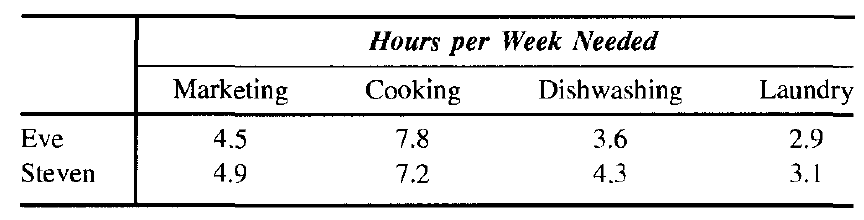

**Modeling:**

$x_{i} \ $   binary variables for Eve

$y_{i} \ $   binary variables for Steven

$\\ $

$Objective\ Function:\\ $

$Min\ Z = 4.5x_{1}+7.8x_{2}+3.6x_{3}+2.9x_{4}+4.9y_{1}+7.2y_{2}+4.3y_{3}+3.1y_{4}$

$\\ $

$Constraints:\\ $


$x_{1}+x_{2}+x_{3}+x_{4} = 2$

$y_{1}+y_{2}+y_{3}+y_{4} = 2$

$x_{1}+y_{1}=1$

$x_{2}+y_{2}=1$

$x_{3}+y_{3}=1$

$x_{4}+y_{4}=1$

## Using Pulp Library

In [1]:
!pip install pulp
from pulp import *
import numpy as np
import pandas as pd

In [2]:
#Defining Variables

x = LpVariable.dicts('x', ((i) for i in [1,2,3,4]), cat='Binary')
y = LpVariable.dicts('y', ((i) for i in [1,2,3,4]), cat='Binary')

$Min\ Z = 4.5x_{1}+7.8x_{2}+3.6x_{3}+2.9x_{4}+4.9y_{1}+7.2y_{2}+4.3y_{3}+3.1y_{4}$

In [3]:
#Defining Objective Function

model = LpProblem('model', LpMinimize)

model += 4.5*x[1]+7.8*x[2]+3.6*x[3]+2.9*x[4]+4.9*y[1]+7.2*y[2]+4.3*y[3]+3.1*y[4]

In [4]:
#Constraints

#Eve and Steven must each perform exactly two task
model += x[1]+x[2]+x[3]+x[4] == 2
model += y[1]+y[2]+y[3]+y[4] == 2

#Each task must be assigned to either Eve or Steven
model += x[1]+y[1] == 1
model += x[2]+y[2] == 1
model += x[3]+y[3] == 1
model += x[4]+y[4] == 1

In [5]:
#Model summary

model

model:
MINIMIZE
4.5*x_1 + 7.8*x_2 + 3.6*x_3 + 2.9*x_4 + 4.9*y_1 + 7.2*y_2 + 4.3*y_3 + 3.1*y_4 + 0.0
SUBJECT TO
_C1: x_1 + x_2 + x_3 + x_4 = 2

_C2: y_1 + y_2 + y_3 + y_4 = 2

_C3: x_1 + y_1 = 1

_C4: x_2 + y_2 = 1

_C5: x_3 + y_3 = 1

_C6: x_4 + y_4 = 1

VARIABLES
0 <= x_1 <= 1 Integer
0 <= x_2 <= 1 Integer
0 <= x_3 <= 1 Integer
0 <= x_4 <= 1 Integer
0 <= y_1 <= 1 Integer
0 <= y_2 <= 1 Integer
0 <= y_3 <= 1 Integer
0 <= y_4 <= 1 Integer

In [6]:
#Solving model

model.solve()
print('Optimal Solution:', pulp.value(model.objective))

Optimal Solution: 18.400000000000002


In [7]:
for variables in model.variables():
  print(f'{variables.name}:{variables.varValue}')

x_1:1.0
x_2:0.0
x_3:1.0
x_4:0.0
y_1:0.0
y_2:1.0
y_3:0.0
y_4:1.0


In [8]:
VNames = []
for variables in model.variables():
  VNames.append(variables.name)

VValue = []
for variables in model.variables():
  VValue.append(np.round(variables.varValue, 2))

data = {'Variables': VNames, 'Value': VValue}
pd.DataFrame(data, index = range(1, len(VValue)+1))

,Variables,Value
1,x_1,1.0
2,x_2,0.0
3,x_3,1.0
4,x_4,0.0
5,y_1,0.0
6,y_2,1.0
7,y_3,0.0
8,y_4,1.0


In [9]:
print('Current Status: ', LpStatus[model.status])

Current Status:  Optimal


## Using Pyomo Library

In [10]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

from pyomo.environ import *

In [11]:
model = ConcreteModel()

model.indices = Set(initialize=list(range(1,5)))
model.x = Var(model.indices, domain=Binary)
model.y = Var(model.indices, domain=Binary)

model.obj = Objective(expr=4.5*model.x[1]+7.8*model.x[2]+3.6*model.x[3]+2.9*model.x[4]+4.9*model.y[1]+7.2*model.y[2]+4.3*model.y[3]+3.1*model.y[4], sense=minimize)

model.constraint1 = Constraint(expr=model.x[1]+model.x[2]+model.x[3]+model.x[4] == 2)
model.constraint2 = Constraint(expr=model.y[1]+model.y[2]+model.y[3]+model.y[4] == 2)
model.constraint3 = Constraint(expr=model.x[1]+model.y[1] == 1)
model.constraint4 = Constraint(expr=model.x[2]+model.y[2] == 1)
model.constraint5 = Constraint(expr=model.x[3]+model.y[3] == 1)
model.constraint6 = Constraint(expr=model.x[4]+model.y[4] == 1)

SolverFactory('glpk').solve(model)

model.display()

Model unknown

  Variables:
    x : Size=4, Index=indices
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   0.0 :     1 : False : False : Binary
          3 :     0 :   1.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
    y : Size=4, Index=indices
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   0.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   1.0 :     1 : False : False : Binary

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 18.400000000000002

  Constraints:
    constraint1 : Size=1
        Key  : Lower : Body : Upper
        None :   2.0 :  2.0 :   2.0
    constraint2 : Size=1
        Key  : Lower : Body : Uppe

In [12]:
print("Variable values:")
model.x.pprint()
model.y.pprint()

Variable values:
x : Size=4, Index=indices
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      1 :     0 :   1.0 :     1 : False : False : Binary
      2 :     0 :   0.0 :     1 : False : False : Binary
      3 :     0 :   1.0 :     1 : False : False : Binary
      4 :     0 :   0.0 :     1 : False : False : Binary
y : Size=4, Index=indices
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      1 :     0 :   0.0 :     1 : False : False : Binary
      2 :     0 :   1.0 :     1 : False : False : Binary
      3 :     0 :   0.0 :     1 : False : False : Binary
      4 :     0 :   1.0 :     1 : False : False : Binary
